In [1]:
# computational imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import string

import ast
from ast import literal_eval

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("darkgrid")

import wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast 
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet


## Reading data - movies metadata csv

In [2]:
# Reading the movies metadata csv file into pandas dataframe
movies_metadata = pd.read_csv('original_movies_metadata.csv')
movies_metadata.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
# checking the shape of dataframe
movies_metadata.shape

(45466, 24)

In [4]:
# checking data types of all objects in the dataframe
movies_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

# Cleaning Data - movies Dataset

In [5]:
# Checking NA counts for each object
movies_metadata.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [6]:
# Creating a new dataset with required fields only
new_movies = movies_metadata[['id', 'title', 'budget', 'genres', 'overview', 'revenue', 'runtime', 'vote_average', 'vote_count', 'tagline', 'popularity', 'release_date', 'spoken_languages']]
new_movies.head()

,id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,release_date,spoken_languages
0,862,Toy Story,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,7.7,5415.0,NaN,21.946943,10/30/1995,"[{'iso_639_1': 'en', 'name': 'English'}]"
1,8844,Jumanji,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,12/15/1995,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,15602,Grumpier Old Men,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,0.0,101.0,6.5,92.0,Still Yelling. Still Fighting. Still Ready for...,11.7129,12/22/1995,"[{'iso_639_1': 'en', 'name': 'English'}]"
3,31357,Waiting to Exhale,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom...",81452156.0,127.0,6.1,34.0,Friends are the people who let you be yourself...,3.859495,12/22/1995,"[{'iso_639_1': 'en', 'name': 'English'}]"
4,11862,Father of the Bride Part II,0,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,76578911.0,106.0,5.7,173.0,Just When His World Is Back To Normal... He's ...,8.387519,2/10/1995,"[{'iso_639_1': 'en', 'name': 'English'}]"


In [7]:
# renaming id as movie_id
new_movies = new_movies.rename(columns={'id': 'movie_id'})

In [8]:
# reviewing the dataset
new_movies.head()

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,release_date,spoken_languages
0,862,Toy Story,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,7.7,5415.0,NaN,21.946943,10/30/1995,"[{'iso_639_1': 'en', 'name': 'English'}]"
1,8844,Jumanji,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,12/15/1995,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,15602,Grumpier Old Men,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,0.0,101.0,6.5,92.0,Still Yelling. Still Fighting. Still Ready for...,11.7129,12/22/1995,"[{'iso_639_1': 'en', 'name': 'English'}]"
3,31357,Waiting to Exhale,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom...",81452156.0,127.0,6.1,34.0,Friends are the people who let you be yourself...,3.859495,12/22/1995,"[{'iso_639_1': 'en', 'name': 'English'}]"
4,11862,Father of the Bride Part II,0,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,76578911.0,106.0,5.7,173.0,Just When His World Is Back To Normal... He's ...,8.387519,2/10/1995,"[{'iso_639_1': 'en', 'name': 'English'}]"


In [9]:
# getting movies' release year from release date
new_movies['release_date'] = pd.to_datetime(new_movies['release_date'],  errors='coerce')
new_movies['release_date'] = pd.to_datetime(new_movies['release_date'],format='%Y%m%d')

new_movies.release_date = pd.to_datetime(new_movies.release_date)

new_movies['year'] = pd.to_datetime(new_movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] 
                                                                           if x != np.nan else np.nan)

new_movies.drop('release_date', axis=1, inplace=True)

print(new_movies.dtypes)

movie_id             object
title                object
budget               object
genres               object
overview             object
revenue             float64
runtime             float64
vote_average        float64
vote_count          float64
tagline              object
popularity           object
spoken_languages     object
year                 object
dtype: object


In [10]:
# getting languages in proper format from spoken languages field
new_movies['languages'] =new_movies['spoken_languages'].apply(lambda x: str(x).split(':')[-1] 
                                                                           if x != np.nan else np.nan).astype(str).replace(r'[^\w\s]|_', '', regex=True)

new_movies.drop('spoken_languages', axis=1, inplace=True)

new_movies.head(3)

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages
0,862,Toy Story,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,7.7,5415.0,NaN,21.946943,1995,English
1,8844,Jumanji,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,1995,Français
2,15602,Grumpier Old Men,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,0.0,101.0,6.5,92.0,Still Yelling. Still Fighting. Still Ready for...,11.7129,1995,English


In [11]:
# finding any NaN values 
print(new_movies[pd.to_numeric(new_movies.movie_id, errors='coerce').isnull()])

        movie_id title                            budget  \
19730  8/20/1997   NaN  /ff9qCepilowshEtG2GYWwzt2bs4.jpg   
29503  9/29/2012   NaN  /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg   
35587   1/1/2014   NaN  /zaSf5OG7V8X8gqFvly88zDdRm46.jpg   

                                                  genres  overview  revenue  \
19730  [{'name': 'Carousel Productions', 'id': 11176}...  Released      NaN   
29503  [{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...  Released      NaN   
35587  [{'name': 'Odyssey Media', 'id': 17161}, {'nam...  Released      NaN   

       runtime  vote_average  vote_count tagline             popularity year  \
19730      NaN           NaN         NaN     NaN                    NaN  NaT   
29503      NaN           NaN         NaN     NaN                    NaN  NaT   
35587      NaN           NaN         NaN     NaN  Beware Of Frost Bites  NaT   

      languages  
19730       nan  
29503       nan  
35587       nan  


In [12]:
# Removing NaN values
#new_movies=new_movies.reset_index() 
#new_movies.drop(new_movies[new_movies.movie_id == "8/20/1997"].index, inplace=True)
#new_movies.drop(new_movies[new_movies.movie_id == "9/29/2012"].index, inplace=True)
#new_movies.drop(new_movies[new_movies.movie_id == "1/1/2014"].index, inplace=True)
new_movies.drop(index=[19730, 29503, 35587], inplace=True)

In [13]:
print(new_movies[pd.to_numeric(new_movies.movie_id, errors='coerce').isnull()])

Empty DataFrame
Columns: [movie_id, title, budget, genres, overview, revenue, runtime, vote_average, vote_count, tagline, popularity, year, languages]
Index: []


In [14]:
# Finding and removing any NaT values
print(new_movies[pd.to_numeric(new_movies.year, errors='coerce').isnull()])

      movie_id                                           title budget  \
711     365371            War Stories Our Mother Never Told Us      0   
734     215107                           Vermont Is for Lovers      0   
3460     94214                      Jails, Hospitals & Hip-Hop      0   
3628    207731                                  Boricua's Bond      0   
5879     99885                             Divine Intervention      0   
...        ...                                             ...    ...   
45148   438910                                 Engineering Red      0   
45203   433711  All Superheroes Must Die 2: The Last Superhero      0   
45338   335251                  The Land Where the Blues Began      0   
45410   449131                                           Aprel      0   
45461   439050                                          Subdue      0   

                                                  genres  \
711                                                   []   
734

In [15]:
new_movies.isna().sum()

movie_id            0
title               3
budget              0
genres              0
overview          954
revenue             3
runtime           260
vote_average        3
vote_count          3
tagline         25051
popularity          3
year                0
languages           0
dtype: int64

In [16]:
new_movies.drop(new_movies[new_movies.year == "NaT"].index, inplace=True)

In [17]:
print(new_movies[pd.to_numeric(new_movies.year, errors='coerce').isnull()])

Empty DataFrame
Columns: [movie_id, title, budget, genres, overview, revenue, runtime, vote_average, vote_count, tagline, popularity, year, languages]
Index: []


In [18]:
# Changing data types of genres, title, languages, overview, movie_id, budget, tagline, popularity and year fields
new_movies = new_movies.astype({'genres':'string', 'title':'string', 'languages':'string', 'overview':'string', 'movie_id':'int64', 'budget':'int64', 'tagline':'string', 'popularity':'float', 'year':'int64' })
new_movies.dtypes

movie_id          int64
title            string
budget            int64
genres           string
overview         string
revenue         float64
runtime         float64
vote_average    float64
vote_count      float64
tagline          string
popularity      float64
year              int64
languages        string
dtype: object

In [19]:
# getting genres in proper format
new_movies['genres'] = new_movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] 
                                                                       if isinstance(x, list) else [])

In [20]:
# checking shape of dataframe
new_movies.shape

(45376, 13)

In [21]:
# Managing missing data
new_movies['title'] = new_movies['title'].fillna(new_movies['title'].mode()[0])
new_movies['genres'].replace(np.nan,'No data',inplace=True)
new_movies['overview'].replace(np.nan,'No data',inplace=True)
new_movies['tagline'].replace(np.nan,'No data',inplace=True)

In [22]:
new_movies.shape

(45376, 13)

In [23]:
new_movies.head()

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages
0,862,Toy Story,30000000,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,7.7,5415.0,No data,21.946943,1995,English
1,8844,Jumanji,65000000,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,1995,Français
2,15602,Grumpier Old Men,0,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,0.0,101.0,6.5,92.0,Still Yelling. Still Fighting. Still Ready for...,11.712900,1995,English
3,31357,Waiting to Exhale,16000000,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...",81452156.0,127.0,6.1,34.0,Friends are the people who let you be yourself...,3.859495,1995,English
4,11862,Father of the Bride Part II,0,[Comedy],Just when George Banks has recovered from his ...,76578911.0,106.0,5.7,173.0,Just When His World Is Back To Normal... He's ...,8.387519,1995,English


In [24]:
# removing any movies with budget as 0
new_movies.drop(new_movies[new_movies.budget <= 0].index, inplace=True)
new_movies.drop(new_movies[new_movies.revenue <= 0].index, inplace=True)


In [25]:
# dropping any NA values if present
new_movies = new_movies.dropna()

In [26]:
new_movies.head()

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages
0,862,Toy Story,30000000,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,7.7,5415.0,No data,21.946943,1995,English
1,8844,Jumanji,65000000,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,1995,Français
3,31357,Waiting to Exhale,16000000,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...",81452156.0,127.0,6.1,34.0,Friends are the people who let you be yourself...,3.859495,1995,English
5,949,Heat,60000000,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,7.7,1886.0,A Los Angeles Crime Saga,17.924927,1995,Español
8,9091,Sudden Death,35000000,"[Action, Adventure, Thriller]",International action superstar Jean Claude Van...,64350171.0,106.0,5.5,174.0,Terror goes into overtime.,5.231580,1995,English


In [27]:
# dropping any duplicate values
new_movies = new_movies.drop_duplicates(subset='title', keep="first", inplace=False)
new_movies.head()

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages
0,862,Toy Story,30000000,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,7.7,5415.0,No data,21.946943,1995,English
1,8844,Jumanji,65000000,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,1995,Français
3,31357,Waiting to Exhale,16000000,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...",81452156.0,127.0,6.1,34.0,Friends are the people who let you be yourself...,3.859495,1995,English
5,949,Heat,60000000,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,7.7,1886.0,A Los Angeles Crime Saga,17.924927,1995,Español
8,9091,Sudden Death,35000000,"[Action, Adventure, Thriller]",International action superstar Jean Claude Van...,64350171.0,106.0,5.5,174.0,Terror goes into overtime.,5.231580,1995,English


In [28]:
print(f'The shape of the dataframe is {new_movies.shape}')

The shape of the dataframe is (5274, 13)


In [29]:
# Checking if any NA value exists in the dataset
new_movies.isna().sum()

movie_id        0
title           0
budget          0
genres          0
overview        0
revenue         0
runtime         0
vote_average    0
vote_count      0
tagline         0
popularity      0
year            0
languages       0
dtype: int64

In [30]:
new_movies.dropna(how='any', inplace=True)

In [31]:
mov_df = new_movies.isna().sum()

In [32]:
movies = new_movies
movies.head(2)

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages
0,862,Toy Story,30000000,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,7.7,5415.0,No data,21.946943,1995,English
1,8844,Jumanji,65000000,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,1995,Français


In [33]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 0 to 45422
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      5274 non-null   int64  
 1   title         5274 non-null   string 
 2   budget        5274 non-null   int64  
 3   genres        5274 non-null   object 
 4   overview      5274 non-null   string 
 5   revenue       5274 non-null   float64
 6   runtime       5274 non-null   float64
 7   vote_average  5274 non-null   float64
 8   vote_count    5274 non-null   float64
 9   tagline       5274 non-null   string 
 10  popularity    5274 non-null   float64
 11  year          5274 non-null   int64  
 12  languages     5274 non-null   string 
dtypes: float64(5), int64(3), object(1), string(4)
memory usage: 576.8+ KB


In [34]:
movies.shape

(5274, 13)

In [35]:
movies.isna().sum()

movie_id        0
title           0
budget          0
genres          0
overview        0
revenue         0
runtime         0
vote_average    0
vote_count      0
tagline         0
popularity      0
year            0
languages       0
dtype: int64

In [36]:
# creating a new field Description by merging Overview and Tagline fields
movies['tagline'] = movies['tagline'].fillna('')
movies['description'] = movies['overview'] + movies['tagline']
movies['description'] = movies['description'].fillna('')
movies.head()

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages,description
0,862,Toy Story,30000000,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,7.7,5415.0,No data,21.946943,1995,English,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,65000000,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,1995,Français,When siblings Judy and Peter discover an encha...
3,31357,Waiting to Exhale,16000000,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...",81452156.0,127.0,6.1,34.0,Friends are the people who let you be yourself...,3.859495,1995,English,"Cheated on, mistreated and stepped on, the wom..."
5,949,Heat,60000000,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,7.7,1886.0,A Los Angeles Crime Saga,17.924927,1995,Español,"Obsessive master thief, Neil McCauley leads a ..."
8,9091,Sudden Death,35000000,"[Action, Adventure, Thriller]",International action superstar Jean Claude Van...,64350171.0,106.0,5.5,174.0,Terror goes into overtime.,5.231580,1995,English,International action superstar Jean Claude Van...


# Reading data - ratings csv

In [37]:
# reading Ratings csv file into Pandas dataframe
ratings = pd.read_csv('ratings.csv')
ratings = ratings.drop('timestamp', axis=1)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [38]:
ratings.shape

(100836, 3)

In [39]:
# description of the data in the dataframe
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [40]:
# checking data type of each column
ratings.dtypes

userId       int64
movieId      int64
rating     float64
dtype: object

In [41]:
# renaming movieId field 
ratings = ratings.rename(columns={'movieId': 'movie_id'})
ratings.head()

,userId,movie_id,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [42]:
# Counting no of unique users
len(ratings['userId'].unique())

610

# Reading data - keywords csv

In [43]:
# reading keywords csv file into Pandas dataframe
keywords = pd.read_csv('keywords.csv')

In [44]:
# renaming id field 
keywords = keywords.rename(columns={'id': 'movie_id'})
keywords['movie_id'] = keywords['movie_id'].astype('int')
keywords['keywords'] = keywords['keywords'].apply(literal_eval)
keywords['keywords'] = keywords['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
keywords.head()

,movie_id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."


In [45]:
s = keywords.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'
s = s.value_counts()
s[:5]

woman director      3115
independent film    1930
murder              1308
based on novel       835
musical              734
Name: keyword, dtype: int64

In [46]:
s = s[s > 1]
stemmer = SnowballStemmer('english')
stemmer.stem('love')

'love'

In [47]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [48]:
keywords['keywords'] = keywords['keywords'].apply(filter_keywords)
keywords['keywords'] = keywords['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
keywords['keywords'] = keywords['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [49]:
keywords.isna().sum()

movie_id    0
keywords    0
dtype: int64

In [50]:
keywords.head(5)

,movie_id,keywords
0,862,"[jealousi, toy, boy, friendship, friend, rival..."
1,8844,"[boardgam, disappear, basedonchildren'sbook, n..."
2,15602,"[fish, bestfriend, duringcreditssting, oldmen]"
3,31357,"[basedonnovel, interracialrelationship, single..."
4,11862,"[babi, midlifecrisi, confid, age, daughter, mo..."


# Reading data - credits csv

In [51]:
# reading credits csv file into Pandas dataframe
credits = pd.read_csv('credits.csv')

In [52]:
credits = credits.rename(columns={'id': 'movie_id'})
credits['movie_id'] = credits['movie_id'].astype('int')

credits['cast'] = credits['cast'].apply(literal_eval)
credits['crew'] = credits['crew'].apply(literal_eval)

credits['cast'] = credits['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
credits['cast'] = credits['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [53]:
def filter_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [54]:
credits['director'] = credits['crew'].apply(filter_director)

In [55]:
credits.isna().sum()

cast          0
crew          0
movie_id      0
director    887
dtype: int64

In [56]:
credits.dropna(inplace= True)

In [57]:
credits.isna().sum()

cast        0
crew        0
movie_id    0
director    0
dtype: int64

In [58]:
credits.drop('crew', axis=1, inplace=True)

In [59]:
credits.head()

,cast,movie_id,director
0,"[Tom Hanks, Tim Allen, Don Rickles]",862,John Lasseter
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",8844,Joe Johnston
2,"[Walter Matthau, Jack Lemmon, Ann-Margret]",15602,Howard Deutch
3,"[Whitney Houston, Angela Bassett, Loretta Devine]",31357,Forest Whitaker
4,"[Steve Martin, Diane Keaton, Martin Short]",11862,Charles Shyer


# Reading data - links csv

In [60]:
links = pd.read_csv('links_small.csv')

In [61]:
links = links.rename(columns={'movieId': 'movie_id'})
links['movie_id'] = links['movie_id'].astype('int')

In [62]:
links.isna().sum()

movie_id     0
imdbId       0
tmdbId      13
dtype: int64

In [63]:
links.shape

(9125, 3)

In [64]:
links.head()

,movie_id,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


# Merging the datasets in one dataset

In [65]:
from functools import reduce
dfs = [movies, ratings, credits, keywords]
merged = reduce(lambda left,right: pd.merge(left,right,on='movie_id'), dfs)
merged.head(5)

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages,description,userId,rating,cast,director,keywords
0,8844,Jumanji,65000000,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,1995,Français,When siblings Judy and Peter discover an encha...,580,3.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[boardgam, disappear, basedonchildren'sbook, n..."
1,949,Heat,60000000,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,7.7,1886.0,A Los Angeles Crime Saga,17.924927,1995,Español,"Obsessive master thief, Neil McCauley leads a ...",74,4.0,"[Al Pacino, Robert De Niro, Val Kilmer]",Michael Mann,"[robberi, detect, bank, obsess, chase, shoot, ..."
2,949,Heat,60000000,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,7.7,1886.0,A Los Angeles Crime Saga,17.924927,1995,Español,"Obsessive master thief, Neil McCauley leads a ...",285,4.0,"[Al Pacino, Robert De Niro, Val Kilmer]",Michael Mann,"[robberi, detect, bank, obsess, chase, shoot, ..."
3,949,Heat,60000000,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,7.7,1886.0,A Los Angeles Crime Saga,17.924927,1995,Español,"Obsessive master thief, Neil McCauley leads a ...",474,3.5,"[Al Pacino, Robert De Niro, Val Kilmer]",Michael Mann,"[robberi, detect, bank, obsess, chase, shoot, ..."
4,949,Heat,60000000,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,7.7,1886.0,A Los Angeles Crime Saga,17.924927,1995,Español,"Obsessive master thief, Neil McCauley leads a ...",489,4.0,"[Al Pacino, Robert De Niro, Val Kilmer]",Michael Mann,"[robberi, detect, bank, obsess, chase, shoot, ..."


In [66]:
# merge `ratings.csv` and `movies.csv` by movieID
#df_merged = pd.merge(ratings, movies, on='movie_id')
#df_merged.head()

In [67]:
df_merged = merged

In [68]:
# reviewing description of the merged dataset
df_merged.describe()

,movie_id,budget,revenue,runtime,vote_average,vote_count,popularity,year,userId,rating
count,19263.000000,1.926300e+04,1.926300e+04,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000
mean,2592.126616,4.049738e+07,1.545007e+08,115.983647,6.798121,1295.020350,11.997689,1993.194103,318.782485,3.498313
std,9011.911306,4.630729e+07,2.289291e+08,21.874668,0.782279,1500.334031,6.679569,15.805709,184.541178,1.041120
min,5.000000,1.000000e+00,5.000000e+00,66.000000,2.300000,1.000000,0.003013,1915.000000,1.000000,0.500000
25%,350.000000,6.000000e+06,2.222231e+07,100.000000,6.300000,323.000000,8.191436,1988.000000,160.000000,3.000000
50%,903.000000,2.500000e+07,7.774557e+07,113.000000,6.900000,688.000000,11.202764,1999.000000,317.000000,3.500000
75%,2023.000000,5.800000e+07,2.002760e+08,126.000000,7.400000,1754.000000,14.003467,2004.000000,474.000000,4.000000
max,123553.000000,3.000000e+08,1.845034e+09,216.000000,8.500000,12269.000000,140.950236,2014.000000,610.000000,5.000000


In [69]:
df_merged.dtypes

movie_id          int64
title            string
budget            int64
genres           object
overview         string
revenue         float64
runtime         float64
vote_average    float64
vote_count      float64
tagline          string
popularity      float64
year              int64
languages        string
description      string
userId            int64
rating          float64
cast             object
director         object
keywords         object
dtype: object

In [70]:
df_merged.shape

(19263, 19)

In [71]:
# dropping duplicates from merged dataset
df_merged = df_merged.drop_duplicates(subset='title', keep="first", inplace=False)

In [72]:
# reviewing NA values if any in the dataset
df_merged.isna().sum()

movie_id        0
title           0
budget          0
genres          0
overview        0
revenue         0
runtime         0
vote_average    0
vote_count      0
tagline         0
popularity      0
year            0
languages       0
description     0
userId          0
rating          0
cast            0
director        0
keywords        0
dtype: int64

In [73]:
df_merged.head(5)

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages,description,userId,rating,cast,director,keywords
0,8844,Jumanji,65000000,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,1995,Français,When siblings Judy and Peter discover an encha...,580,3.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[boardgam, disappear, basedonchildren'sbook, n..."
1,949,Heat,60000000,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,7.7,1886.0,A Los Angeles Crime Saga,17.924927,1995,Español,"Obsessive master thief, Neil McCauley leads a ...",74,4.0,"[Al Pacino, Robert De Niro, Val Kilmer]",Michael Mann,"[robberi, detect, bank, obsess, chase, shoot, ..."
7,710,GoldenEye,58000000,"[Adventure, Action, Thriller]",James Bond must unmask the mysterious head of ...,352194034.0,130.0,6.6,1194.0,No limits. No fears. No substitutes.,14.686036,1995,Español,James Bond must unmask the mysterious head of ...,6,3.0,"[Pierce Brosnan, Sean Bean, Izabella Scorupco]",Martin Campbell,"[cuba, falselyaccus, secretident, computerviru..."
15,1408,Cutthroat Island,98000000,"[Action, Adventure]","Morgan Adams and her slave, William Shaw, are ...",10017322.0,119.0,5.7,137.0,The Course Has Been Set. There Is No Turning B...,7.284477,1995,Latin,"Morgan Adams and her slave, William Shaw, are ...",1,3.0,"[Geena Davis, Matthew Modine, Frank Langella]",Renny Harlin,"[exoticisland, treasur, map, ship, scalp, pirat]"
54,524,Casino,52000000,"[Drama, Crime]",The life of the gambling paradise – Las Vegas ...,116112375.0,178.0,7.8,1343.0,No one stays at the top forever.,10.137389,1995,English,The life of the gambling paradise – Las Vegas ...,6,3.0,"[Robert De Niro, Sharon Stone, Joe Pesci]",Martin Scorsese,"[poker, drugabus, 1970s, overdos, illegalprost..."


## Exploratory Analysis

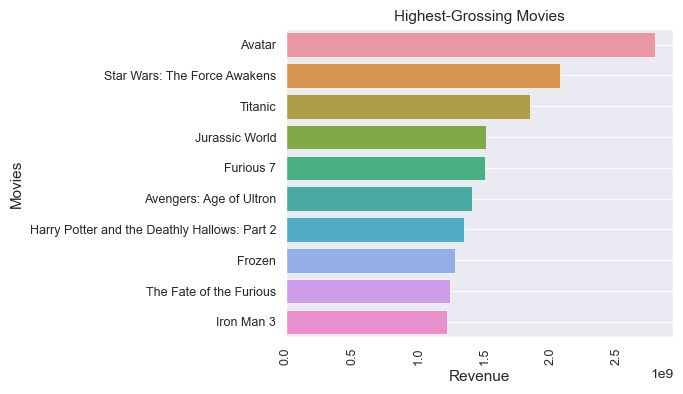

In [74]:
# Highest-Grossing movies using "movies" dataset

plt.figure(figsize = (5, 4))

ax = sns.barplot(y = 'title'[:10], x = 'revenue'[:10],  data = movies.nlargest(10, "revenue").head(10), orient='h')

plt.tick_params(labelsize = 9) 

ax.tick_params(axis='x', rotation=90)
plt.title("Highest-Grossing Movies", fontsize = 11)
plt.xlabel("Revenue", fontsize = 11)
plt.ylabel("Movies", fontsize = 11)
plt.grid()
plt.show()

In [75]:
# Year when most movies were released
df_year = df_merged.groupby('year').count()['movie_id']
df_year.tail()

year
2010     7
2011    13
2012     6
2013     5
2014     1
Name: movie_id, dtype: int64

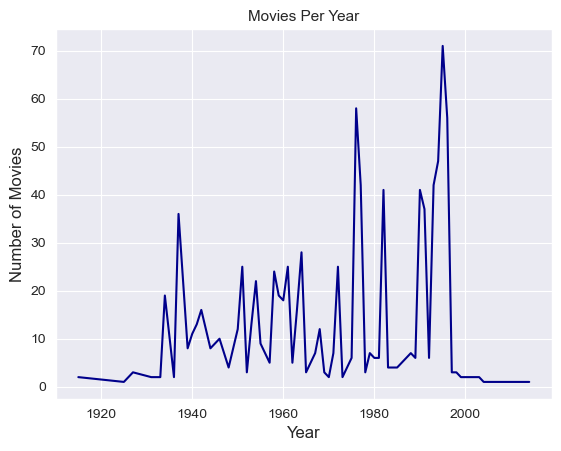

In [76]:
# Number of movies released by year
movies_per_year = df_merged.year.value_counts()

plt.title('Movies Per Year', size=11)
plt.xlabel('Year')
plt.ylabel('Number of Movies')

sns.lineplot(x=df_merged['year'].unique(), y=movies_per_year, color='darkblue');

In [77]:
# average of the ratings
df_avg= df_merged['rating'].mean() 

print('The average of all movie ratings is: ', df_avg)

The average of all movie ratings is:  3.297242083758938


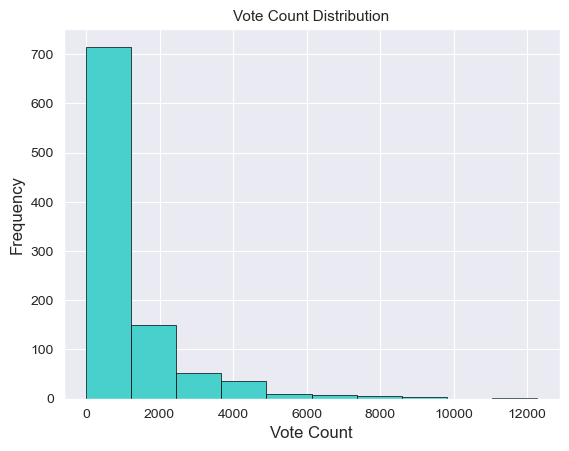

In [78]:
# Reviewing Vote Count distribution
plt.title("Vote Count Distribution", size=11) #setting the title of the plot
plt.xlabel('Vote Count') # setting the x label of the plot
plt.ylabel('Frequency') # setting the y label of the plot
plt.hist(df_merged['vote_count'], color="mediumturquoise", edgecolor='black'); # plotting the points on the histogram

In [79]:
# formatting the languages field
import string
import re

def strip_character(dataCol):
    r = re.compile(r'[^a-zA-Z !@#$%&*_+-=|\:";<>,./()[\]{}\']')
    return r.sub('', dataCol)


df_merged['languages'] = df_merged['languages'].apply(strip_character)

In [80]:
# Count of Movies by language 
lang = df_merged.groupby('languages')['languages'].count().nlargest(15)
lang


languages
 English     629
              71
 Espaol       68
 Franais      51
 P            36
 Italiano     32
 Deutsch      20
 Latin        12
 Portugus      8
 Magyar        7
               6
 svenska       5
 Polski        4
 Romn          4
 Trke          4
Name: languages, dtype: int64

In [81]:
pd.isna(df_merged['languages'])

0        False
1        False
7        False
15       False
54       False
         ...  
19149    False
19151    False
19172    False
19260    False
19262    False
Name: languages, Length: 979, dtype: bool

In [82]:
df_na = df_merged
df_na.dropna(inplace = True)

df_na['languages'].replace(' ','').fillna('No language', inplace=True)
df_na.shape

(979, 19)

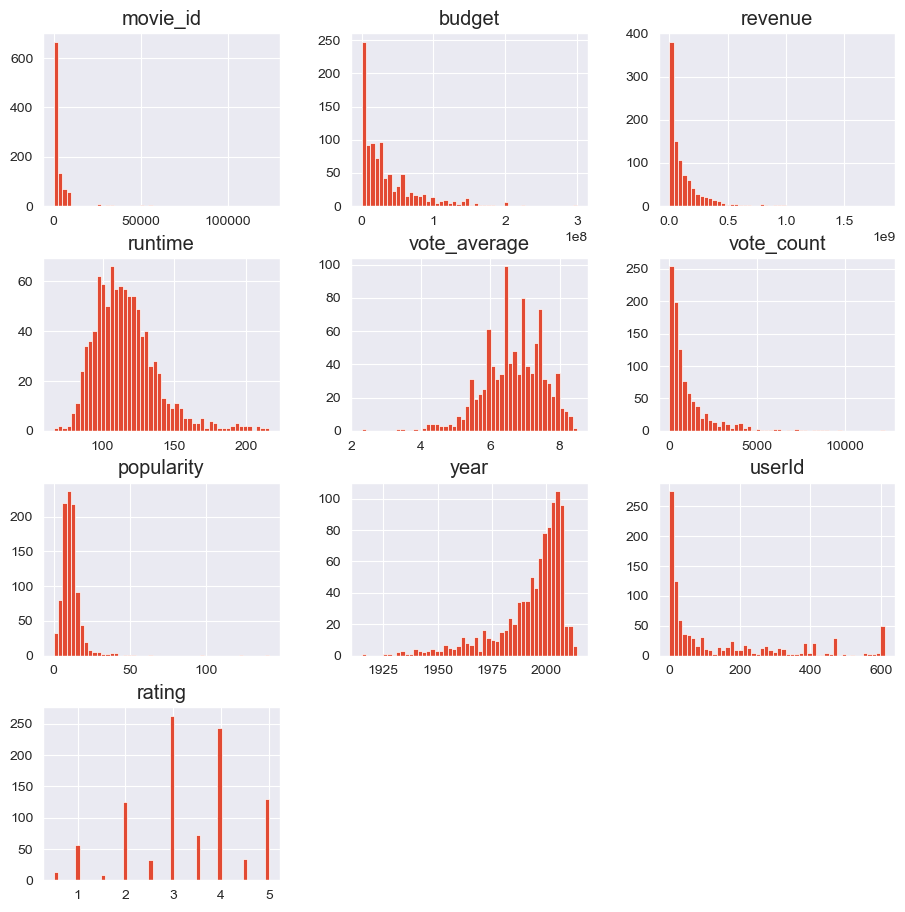

In [83]:
# overall distribution of data 
df_merged.hist(figsize = (11,11), bins=50);

(array([ 7.,  0.,  4.,  0.,  1.,  0., 26.,  0.,  1.,  1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

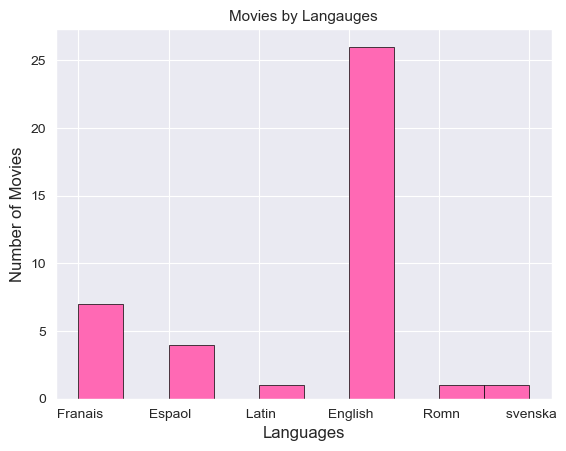

In [84]:
# Number of movies released by year
lang_df = df_na.apply(lambda x: x.str.strip() if x.dtype == "string" else x)
mask = (lang_df['languages'].str.len() >= 4)

lang_df = lang_df.loc[mask]
lang_df.head(5)
movies_per_year = lang_df.year.value_counts().sort_values(ascending=True)

plt.title('Movies by Langauges', size=11)
plt.xlabel('Languages')
plt.ylabel('Number of Movies')

plt.hist(lang_df['languages'][:40], color="hotpink", edgecolor='black')

In [85]:
# most frequent keywords
freq_words = df_merged.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
freq_words.name = 'keyword'
freq_words = freq_words.value_counts()
freq_words[:5]

murder           56
dyinganddeath    51
violenc          51
dystopia         47
basedonnovel     47
Name: keyword, dtype: int64

(-0.5, 999.5, 799.5, -0.5)

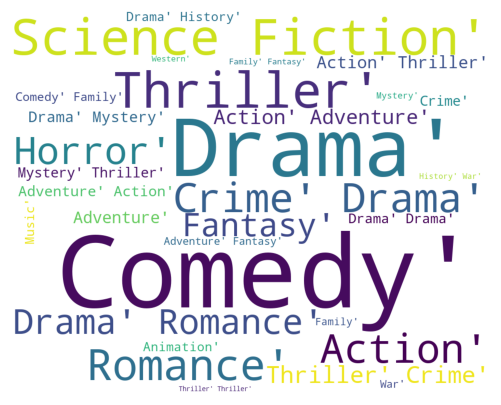

In [86]:
# Word cloud based on movie genre
description=" ".join(df_merged.genres.astype(str).to_list())

stopword = set(list(STOPWORDS) + ['br',]) 

wordcloud = WordCloud(width = 1000, height = 800, 
                       background_color ='White', 
                       stopwords = stopword, 
                       min_font_size = 14).generate(description) 

# plotting word cloud
plt.figure(figsize = (8, 5)) 
plt.imshow(wordcloud) 
plt.axis("off")  

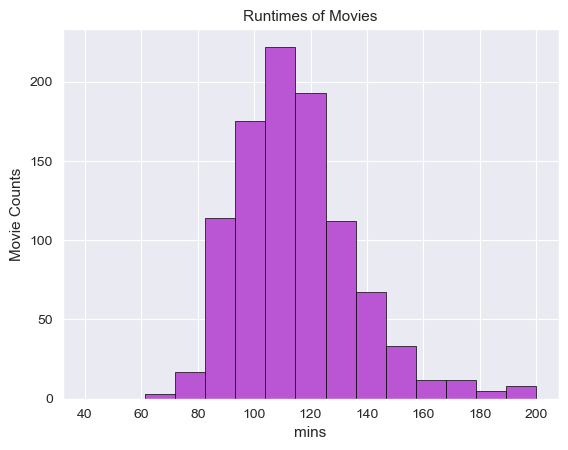

In [87]:
# movies with runtime greater than 40
df_merged = df_merged[df_merged['runtime'] > 40]

plt.hist(df_merged['runtime'],range=(40,200), bins=15, color = 'mediumorchid', edgecolor='black')
plt.title('Runtimes of Movies', fontsize=11)
plt.xlabel('mins', fontsize=11)
plt.ylabel('Movie Counts', fontsize=11)
plt.show()

In [88]:
# calculating profit
df_merged['profit']=df_merged['revenue'] - df_merged['budget']
df_merged.head(3)

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages,description,userId,rating,cast,director,keywords,profit
0,8844,Jumanji,65000000,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,1995,Franais,When siblings Judy and Peter discover an encha...,580,3.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[boardgam, disappear, basedonchildren'sbook, n...",197797249.0
1,949,Heat,60000000,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,7.7,1886.0,A Los Angeles Crime Saga,17.924927,1995,Espaol,"Obsessive master thief, Neil McCauley leads a ...",74,4.0,"[Al Pacino, Robert De Niro, Val Kilmer]",Michael Mann,"[robberi, detect, bank, obsess, chase, shoot, ...",127436818.0
7,710,GoldenEye,58000000,"[Adventure, Action, Thriller]",James Bond must unmask the mysterious head of ...,352194034.0,130.0,6.6,1194.0,No limits. No fears. No substitutes.,14.686036,1995,Espaol,James Bond must unmask the mysterious head of ...,6,3.0,"[Pierce Brosnan, Sean Bean, Izabella Scorupco]",Martin Campbell,"[cuba, falselyaccus, secretident, computerviru...",294194034.0


In [89]:
df_merged[df_merged["profit"]==df_merged["profit"].max()]

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages,description,userId,rating,cast,director,keywords,profit
4611,597,Titanic,200000000,"[Drama, Romance, Thriller]","84 years later, a 101-year-old woman named Ros...",1.845034e+09,194.0,7.5,7770.0,Nothing on Earth could come between them.,26.88907,1997,P,"84 years later, a 101-year-old woman named Ros...",5,3.0,"[Kate Winslet, Leonardo DiCaprio, Frances Fisher]",James Cameron,"[shipwreck, iceberg, ship, panic, titan, ocean...",1.645034e+09


In [90]:
# profit by year
profit_by_year = df_merged.groupby(["year","title"]).profit.mean().reset_index().sort_values("year", ascending=False)

profit_by_year.head()

,year,title,profit
978,2014,Sin City: A Dame to Kill For,-25592384.0
977,2013,The Smurfs 2,242434178.0
976,2013,The Mortal Instruments: City of Bones,30565421.0
975,2013,R.I.P.D.,-68351500.0
974,2013,Escape Plan,72915111.0


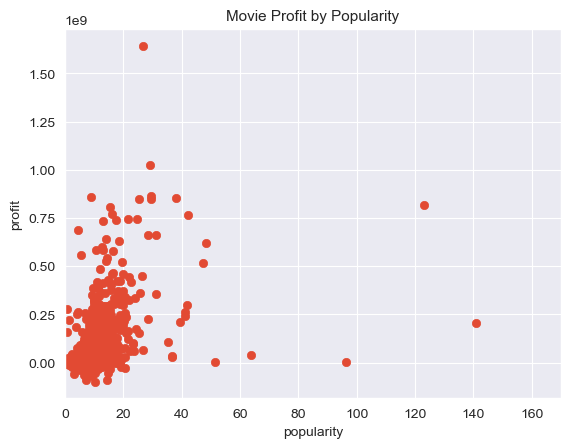

In [91]:
# Movie Profit by Popularity
df_merged["profit"].corr(df_merged["popularity"])

plt.title("Movie Profit by Popularity",fontsize=11)            
plt.xlabel('popularity',fontsize = 10)
plt.ylabel('profit',fontsize = 10)

plt.scatter(df_merged["popularity"],df_merged["profit"])

plt.xlim([0,170])
plt.show()

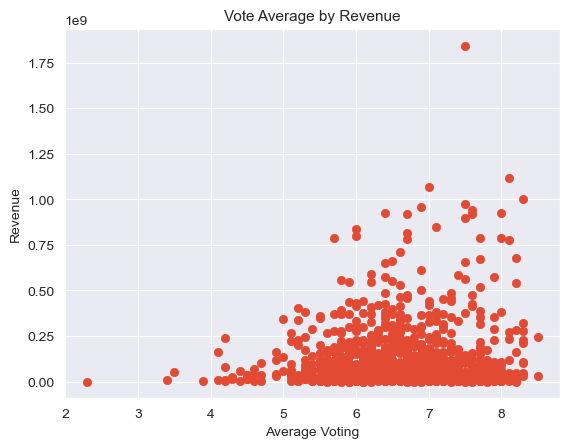

In [92]:
# vote_average by revenue
plt.scatter(x=df_merged.vote_average, y=df_merged.revenue)
plt.title('Vote Average by Revenue',fontsize = 11)
plt.xlabel('Average Voting',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)

plt.show()

Text(0.5, 0, 'Profit')

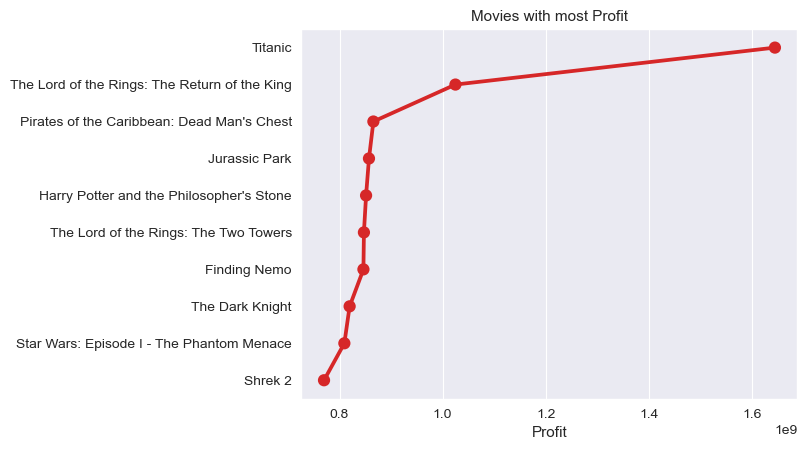

In [93]:
# Movies with most profit
df_profit = pd.DataFrame(df_merged['profit'].sort_values(ascending = False))
df_profit['title'] = df_merged['title']
data = list(map(str,(df_profit['title'])))
x = list(data[:10])
y = list(df_profit['profit'][:10])

ax = sns.pointplot(x=y,y=x, color='#d62728')

sns.set(rc={'figure.figsize':(6,4)})

ax.set_title("Movies with most Profit",fontsize = 11)
ax.set_xlabel("Profit",fontsize = 11)


In [94]:
# calculate movie profit 
def calc_func(x):
    
    highest = df_merged[x].idxmax()
    highest_details = pd.DataFrame(df_merged.loc[highest])
    
    # calculate minimum value
    lowest = df_merged[x].idxmin()
    lowest_details = pd.DataFrame(df_merged.loc[lowest])  
    
    print('Movie with highest '+x+' : ', df_merged['title'][highest])
    print('Movie with lowest '+x+' : ', df_merged['title'][lowest])

calc_func('profit')

Movie with highest profit :  Titanic
Movie with lowest profit :  The 13th Warrior


In [95]:
# movies with least and max profit
def least_most_info (col):

    max_m = df_merged[col].idxmax()
    max_df = pd.DataFrame(df_merged.loc[max_m])
    
    min_m = df_merged[col].idxmin()
    min_df = pd.DataFrame(df_merged.loc[min_m])

    least_most_info = pd.concat([max_df, min_df], axis = 1)
    
    return least_most_info

least_most_info('profit')

,4611,7430
movie_id,597,1911
title,Titanic,The 13th Warrior
budget,200000000,160000000
genres,"[Drama, Romance, Thriller]","[Adventure, Fantasy, Action]"
overview,"84 years later, a 101-year-old woman named Ros...","In AD 922, Arab courtier, Ahmad Ibn Fadlan acc..."
revenue,1845034188.0,61698899.0
runtime,194.0,102.0
vote_average,7.5,6.4
vote_count,7770.0,524.0
tagline,Nothing on Earth could come between them.,Prey for the living.


Most popular runtime: 152.0 minutes.


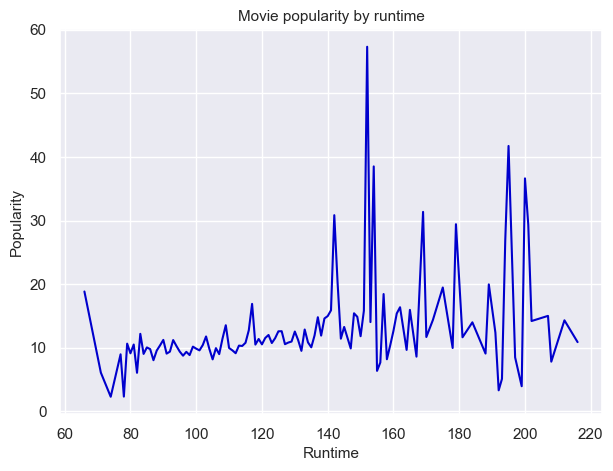

In [96]:
# Movie popularity by runtime
popular_movie = df_merged.groupby('runtime')['popularity'].mean()
popular_movie.plot(figsize = (7,5), color = 'mediumblue')
        
plt.title("Movie popularity by runtime",fontsize=11)            
plt.xlabel('Runtime',fontsize = 11)
plt.ylabel('Popularity',fontsize = 11)

max_run= popular_movie.idxmax()

print('Most popular runtime:', max_run, 'minutes.')

In [97]:
# getting a list of unique genres 
def unlock_list_from_string(string, delim=','):
    if (type(string)!=str and (string != '')):
        return string

    clean_string = re.sub('\[|\]', '', string)
    print(clean_string)
    unlocked_string = clean_string.split(delim)
    print(unlocked_string)
    unlocked_list = [x.strip() for x in unlocked_string]
    return unlocked_list

unique_genres_nested = df_merged['genres'].apply(unlock_list_from_string)

unique_genres = [x for y in unique_genres_nested for x in y ]
unique_genres = list(set(unique_genres))

unique_genres.sort()
print(unique_genres)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western']


In [98]:
# Analyzing genres
genre_detail = df_merged.copy()

for genres in unique_genres :
    genre_detail[genres] = genre_detail.apply(lambda _:int(genres in _.genres), axis = 1)

genre_detail.tail(5)

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,...,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
19149,105254,The Touch,6900000,[Drama],A seemingly happy Swedish housewife and mother...,6530000.0,115.0,6.0,3.0,The Touch is the total expression of love.,...,0,0,0,0,0,0,0,0,0,0
19151,2989,Roar,17000000,"[Adventure, Thriller]",Roar follows a family who are attacked by vari...,2000000.0,102.0,5.6,19.0,No animals were harmed in the making of this m...,...,0,0,0,0,0,0,0,1,0,0
19172,2324,Local Color,3250000,[Drama],A successful artist looks back with loving mem...,32788.0,107.0,6.1,8.0,No data,...,0,0,0,0,0,0,0,0,0,0
19260,110669,Wabash Avenue,2115000,[Music],Andy Clark discovers he was cheated out of a h...,2039000.0,92.0,7.0,1.0,No data,...,0,0,0,1,0,0,0,0,0,0
19262,26147,FC Venus,2196531,"[Comedy, Romance]","Pete is a football enthusiast, who plays as a ...",2411594.0,107.0,5.6,10.0,No data,...,0,0,0,0,0,1,0,0,0,0


In [99]:
df_merged.head(5)

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages,description,userId,rating,cast,director,keywords,profit
0,8844,Jumanji,65000000,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,1995,Franais,When siblings Judy and Peter discover an encha...,580,3.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[boardgam, disappear, basedonchildren'sbook, n...",197797249.0
1,949,Heat,60000000,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,7.7,1886.0,A Los Angeles Crime Saga,17.924927,1995,Espaol,"Obsessive master thief, Neil McCauley leads a ...",74,4.0,"[Al Pacino, Robert De Niro, Val Kilmer]",Michael Mann,"[robberi, detect, bank, obsess, chase, shoot, ...",127436818.0
7,710,GoldenEye,58000000,"[Adventure, Action, Thriller]",James Bond must unmask the mysterious head of ...,352194034.0,130.0,6.6,1194.0,No limits. No fears. No substitutes.,14.686036,1995,Espaol,James Bond must unmask the mysterious head of ...,6,3.0,"[Pierce Brosnan, Sean Bean, Izabella Scorupco]",Martin Campbell,"[cuba, falselyaccus, secretident, computerviru...",294194034.0
15,1408,Cutthroat Island,98000000,"[Action, Adventure]","Morgan Adams and her slave, William Shaw, are ...",10017322.0,119.0,5.7,137.0,The Course Has Been Set. There Is No Turning B...,7.284477,1995,Latin,"Morgan Adams and her slave, William Shaw, are ...",1,3.0,"[Geena Davis, Matthew Modine, Frank Langella]",Renny Harlin,"[exoticisland, treasur, map, ship, scalp, pirat]",-87982678.0
54,524,Casino,52000000,"[Drama, Crime]",The life of the gambling paradise – Las Vegas ...,116112375.0,178.0,7.8,1343.0,No one stays at the top forever.,10.137389,1995,English,The life of the gambling paradise – Las Vegas ...,6,3.0,"[Robert De Niro, Sharon Stone, Joe Pesci]",Martin Scorsese,"[poker, drugabus, 1970s, overdos, illegalprost...",64112375.0


In [100]:
# Genre percentage and count of occurances
df_merged_new = df_merged.astype({'genres':'string'})

genres = df_merged_new['genres'].apply(eval).apply('|'.join)
genres = genres.str.get_dummies(sep='|')

genres_count = genres.sum(axis = 0).to_frame().reset_index()
genres_count.columns =['genres', 'count']
genres_count = genres_count.sort_values(by='count', ascending=False)

print('The total number of genres is:', genres_count.shape[0])
genres_count['percentage(%)'] = round(genres_count['count']/sum(genres_count['count']), 4)*100
genres_count 

The total number of genres is: 19


,genres,count,percentage(%)
6,Drama,496,18.49
16,Thriller,338,12.60
3,Comedy,282,10.51
0,Action,271,10.10
4,Crime,207,7.72
1,Adventure,202,7.53
14,Romance,186,6.93
15,Science Fiction,146,5.44
13,Mystery,114,4.25
8,Fantasy,110,4.10


In [101]:
df_merged_new.head(5)

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages,description,userId,rating,cast,director,keywords,profit
0,8844,Jumanji,65000000,"['Adventure', 'Fantasy', 'Family']",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,1995,Franais,When siblings Judy and Peter discover an encha...,580,3.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[boardgam, disappear, basedonchildren'sbook, n...",197797249.0
1,949,Heat,60000000,"['Action', 'Crime', 'Drama', 'Thriller']","Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,7.7,1886.0,A Los Angeles Crime Saga,17.924927,1995,Espaol,"Obsessive master thief, Neil McCauley leads a ...",74,4.0,"[Al Pacino, Robert De Niro, Val Kilmer]",Michael Mann,"[robberi, detect, bank, obsess, chase, shoot, ...",127436818.0
7,710,GoldenEye,58000000,"['Adventure', 'Action', 'Thriller']",James Bond must unmask the mysterious head of ...,352194034.0,130.0,6.6,1194.0,No limits. No fears. No substitutes.,14.686036,1995,Espaol,James Bond must unmask the mysterious head of ...,6,3.0,"[Pierce Brosnan, Sean Bean, Izabella Scorupco]",Martin Campbell,"[cuba, falselyaccus, secretident, computerviru...",294194034.0
15,1408,Cutthroat Island,98000000,"['Action', 'Adventure']","Morgan Adams and her slave, William Shaw, are ...",10017322.0,119.0,5.7,137.0,The Course Has Been Set. There Is No Turning B...,7.284477,1995,Latin,"Morgan Adams and her slave, William Shaw, are ...",1,3.0,"[Geena Davis, Matthew Modine, Frank Langella]",Renny Harlin,"[exoticisland, treasur, map, ship, scalp, pirat]",-87982678.0
54,524,Casino,52000000,"['Drama', 'Crime']",The life of the gambling paradise – Las Vegas ...,116112375.0,178.0,7.8,1343.0,No one stays at the top forever.,10.137389,1995,English,The life of the gambling paradise – Las Vegas ...,6,3.0,"[Robert De Niro, Sharon Stone, Joe Pesci]",Martin Scorsese,"[poker, drugabus, 1970s, overdos, illegalprost...",64112375.0


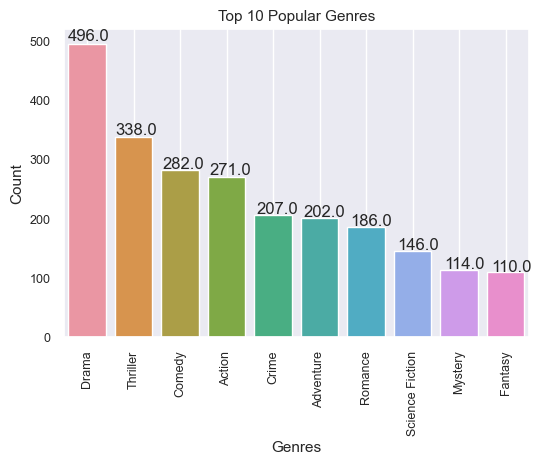

In [102]:
# top 10 genres
plt.figure(figsize = (6, 4))

ax = sns.set_palette("Spectral") 
ax = sns.barplot(x = 'genres'[:10],
                 y = 'count'[:10],
                 data = genres_count.head(10))

for q in ax.patches:
    ax.annotate(str(q.get_height()), (q.get_x() * 1.01 , q.get_height() * 1.01))

plt.tick_params(labelsize = 9) 
ax.tick_params(axis='x', rotation=90)
plt.title("Top 10 Popular Genres", fontsize = 11)
plt.xlabel("Genres", fontsize = 11)
plt.ylabel("Count", fontsize = 11)
plt.grid()
plt.show()

In [103]:
# analyzing ratings in merged dataset
sum_rating = df_merged.groupby(['movie_id', 'title'], as_index=False)['rating'].sum().rename(columns={'rating':'sum'}).sort_values(by='sum', ascending=False)
num_rating = df_merged.groupby(['movie_id'])['title'].count().to_frame().reset_index().rename(columns={'title':'num_rating'})
detail_rating = pd.merge(sum_rating, num_rating, on='movie_id')
detail_rating['average_rating'] = detail_rating['sum']/detail_rating['num_rating']

# Show the top 5 sum of rating
detail_rating_new = detail_rating.drop_duplicates(subset='average_rating')
detail_rating_new.sort_values(by=['average_rating','num_rating'], ascending=False).iloc[:5]


,movie_id,title,sum,num_rating,average_rating
0,5,Four Rooms,5.0,1,5.0
130,7459,Speed Racer,4.5,1,4.5
164,813,Airplane!,4.0,1,4.0
407,1430,Bowling for Columbine,3.5,1,3.5
480,3563,I Now Pronounce You Chuck & Larry,3.0,1,3.0


In [104]:
# Counting the number of unique movies in the dataset.
len(ratings['movie_id'].unique())

9724

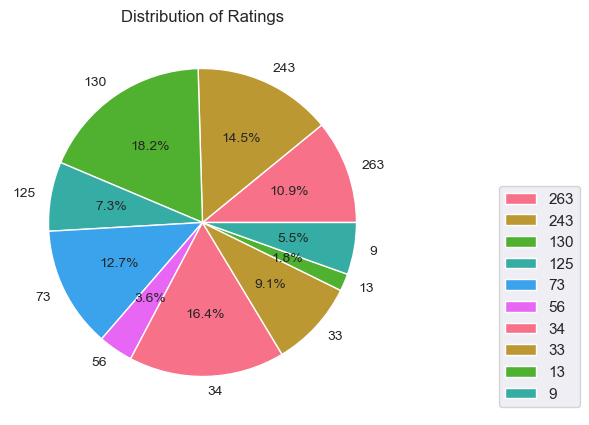

In [105]:
# Distribution of ratings for all movies
ratings = df_merged['rating'].value_counts()
numbers = ratings.index
quantity = ratings.values

colors = sns.color_palette("husl")

plt.figure(figsize = (8,5))
plt.title('Distribution of Ratings')

plt.pie(ratings.index,labels=ratings.values, colors = colors,autopct='%1.1f%%',textprops= {"fontsize": 10},shadow = False)
plt.legend(ratings.index, labels=ratings.values, bbox_to_anchor=(1.5,0), loc="lower right")
plt.show()

<AxesSubplot: >

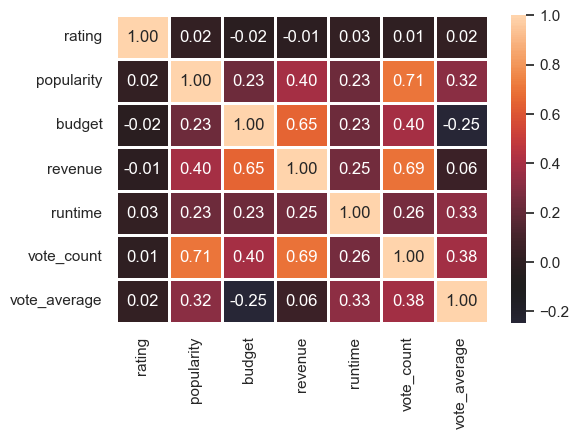

In [106]:
# Correlation Heatmap to check strength of relationships between numerical variables
corr_df = df_merged[['rating','popularity','budget','revenue','runtime','vote_count','vote_average']]
sns.heatmap(corr_df.corr(), linecolor = "White", linewidths =0.75, center = -0.1, annot = True, fmt = ".2f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, ' Regression model $R^2= 0.50$')

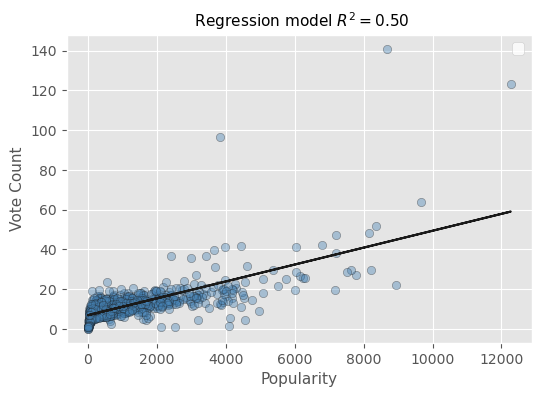

In [107]:
# Regression Model - correlation between vote counts and popularity to predict popularity against vote counts.

X = df_merged['vote_count'].values.reshape(-1,1)
y = df_merged['popularity'].values

ols = linear_model.LinearRegression()
lm = ols.fit(X, y)
res = lm.predict(X)
r2 = lm.score(X, y)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(X, res, color='k')
ax.scatter(X, y, edgecolor='k', facecolor='steelblue', alpha=0.4)
ax.set_ylabel('Vote Count', fontsize=11)
ax.set_xlabel('Popularity', fontsize=11)
ax.legend(facecolor='white', fontsize=11)
ax.set_title(' Regression model $R^2= %.2f$' % r2, fontsize=11)


In [108]:
ols.coef_

array([0.0042528])

In [109]:
ols.intercept_

6.799784207905876

In [110]:
ols.predict([[265000000]])

array([1126999.97253045])

In [111]:
ols.score(X, y)

0.4976689237855456

This explains almost 50% of the variations in the popularity considering a single variable. 

# Content Based Recommendation System

In [112]:
df_merged.head(5)

,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,tagline,popularity,year,languages,description,userId,rating,cast,director,keywords,profit
0,8844,Jumanji,65000000,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,262797249.0,104.0,6.9,2413.0,Roll the dice and unleash the excitement!,17.015539,1995,Franais,When siblings Judy and Peter discover an encha...,580,3.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[boardgam, disappear, basedonchildren'sbook, n...",197797249.0
1,949,Heat,60000000,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,7.7,1886.0,A Los Angeles Crime Saga,17.924927,1995,Espaol,"Obsessive master thief, Neil McCauley leads a ...",74,4.0,"[Al Pacino, Robert De Niro, Val Kilmer]",Michael Mann,"[robberi, detect, bank, obsess, chase, shoot, ...",127436818.0
7,710,GoldenEye,58000000,"[Adventure, Action, Thriller]",James Bond must unmask the mysterious head of ...,352194034.0,130.0,6.6,1194.0,No limits. No fears. No substitutes.,14.686036,1995,Espaol,James Bond must unmask the mysterious head of ...,6,3.0,"[Pierce Brosnan, Sean Bean, Izabella Scorupco]",Martin Campbell,"[cuba, falselyaccus, secretident, computerviru...",294194034.0
15,1408,Cutthroat Island,98000000,"[Action, Adventure]","Morgan Adams and her slave, William Shaw, are ...",10017322.0,119.0,5.7,137.0,The Course Has Been Set. There Is No Turning B...,7.284477,1995,Latin,"Morgan Adams and her slave, William Shaw, are ...",1,3.0,"[Geena Davis, Matthew Modine, Frank Langella]",Renny Harlin,"[exoticisland, treasur, map, ship, scalp, pirat]",-87982678.0
54,524,Casino,52000000,"[Drama, Crime]",The life of the gambling paradise – Las Vegas ...,116112375.0,178.0,7.8,1343.0,No one stays at the top forever.,10.137389,1995,English,The life of the gambling paradise – Las Vegas ...,6,3.0,"[Robert De Niro, Sharon Stone, Joe Pesci]",Martin Scorsese,"[poker, drugabus, 1970s, overdos, illegalprost...",64112375.0


In [113]:
df_merged.shape

(979, 20)

### Obtaining TF-IDF vectors

In [114]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_merged['description'])

In [115]:
tfidf_matrix.shape

(979, 37343)

### Finding similarities with Cosine Similarity

In [116]:
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [117]:
df_merged = df_merged.reset_index()
titles = df_merged['title']
indices = pd.Series(df_merged.index, index=df_merged['title'])
indices.head(2)

title
Jumanji    0
Heat       1
dtype: int64

### Movie Title Recommendation

In [118]:
def recommend_movie(title):
    idx = indices[title]
    print(indices[title])
    if type(idx) != np.int64:
        if len(idx)>1:
            print("ALERT: Multiple values")
            idx = idx[0]
    sim_scores = list(enumerate(cosine_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [119]:
recommend_movie('Titanic').head(10)

226


171       Fried Green Tomatoes
552       K-19: The Widowmaker
626              Battle Royale
260     The Poseidon Adventure
558                     Exodus
818         Notes on a Scandal
182    When Harry Met Sally...
541               The Believer
460          Finding Forrester
721                   Downfall
Name: title, dtype: string

In [120]:
recommend_movie('Independence Day').head(10)

83


236                      Deep Impact
894      Aliens vs Predator: Requiem
193    Star Trek IV: The Voyage Home
151                            Alien
240                       Armageddon
970                      Battletruck
884                  Southland Tales
433                       Titan A.E.
485                            Krull
188    Star Trek: The Motion Picture
Name: title, dtype: string

In [121]:
recommend_movie('Star Wars').head(10)

30


138                         The Empire Strikes Back
149                              Return of the Jedi
844                                 Shrek the Third
421                 On Her Majesty's Secret Service
731    Star Wars: Episode III - Revenge of the Sith
665                                         Shrek 2
139                              The Princess Bride
886                                       Enchanted
469                                   The Lost Boys
193                   Star Trek IV: The Voyage Home
Name: title, dtype: string

### Genre Recommendation

In [122]:
from itertools import combinations
tf = TfidfVectorizer(analyzer= lambda s: (c for i in range(1,4) for c in combinations([' '.join(x) for x in s], r=i)))
 # lambda s: (c for i in range(1,4) for c in combinations(s.split(','), r=i)))
tfidf_matrix = tf.fit_transform(df_merged['genres'])
tfidf_matrix.shape

(979, 770)

In [123]:
pd.DataFrame(tfidf_matrix.todense(), columns=tf.get_feature_names(), index=df_merged.title).sample(5, axis=1).sample(10, axis=0)

,"(F a m i l y, A n i m a t i o n)","(A d v e n t u r e, A c t i o n, F a n t a s y)","(D r a m a, T h r i l l e r, A d v e n t u r e)","(F a n t a s y, S c i e n c e F i c t i o n, H o r r o r)","(R o m a n c e, F a m i l y)"
title,,,,,
Lawrence of Arabia,0.0,0.0,0.0,0.0,0.0
The Sixth Sense,0.0,0.0,0.0,0.0,0.0
Friends with Money,0.0,0.0,0.0,0.0,0.0
Voyage to the Bottom of the Sea,0.0,0.0,0.0,0.0,0.0
The Rapture,0.0,0.0,0.0,0.0,0.0
There's Something About Mary,0.0,0.0,0.0,0.0,0.0
Captain America: The First Avenger,0.0,0.0,0.0,0.0,0.0
Van Helsing,0.0,0.0,0.0,0.0,0.0
Memoirs of a Geisha,0.0,0.0,0.0,0.0,0.0


In [124]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [125]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_merged['title'], columns=df_merged['title'])
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).round(2)

Shape: (979, 979)


title,Big Trouble in Little China,Star Trek III: The Search for Spock,Indiana Jones and the Kingdom of the Crystal S...,Bring It On,Hatchet II
title,,,,,
Jumanji,0.18,0.04,0.11,0.00,0.00
Heat,0.02,0.09,0.08,0.00,0.03
GoldenEye,0.08,0.29,0.60,0.00,0.04
Cutthroat Island,0.30,0.32,0.47,0.00,0.00
Casino,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
The Touch,0.00,0.00,0.00,0.00,0.00
Roar,0.08,0.32,0.26,0.00,0.07
Local Color,0.00,0.00,0.00,0.00,0.00


In [126]:
def recommend_genres(i, M, items, k=10):
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [127]:
df_merged[df_merged.title.eq('Titanic')]

,index,movie_id,title,budget,genres,overview,revenue,runtime,vote_average,vote_count,...,popularity,year,languages,description,userId,rating,cast,director,keywords,profit
226,4611,597,Titanic,200000000,"[Drama, Romance, Thriller]","84 years later, a 101-year-old woman named Ros...",1.845034e+09,194.0,7.5,7770.0,...,26.88907,1997,P,"84 years later, a 101-year-old woman named Ros...",5,3.0,"[Kate Winslet, Leonardo DiCaprio, Frances Fisher]",James Cameron,"[shipwreck, iceberg, ship, panic, titan, ocean...",1.645034e+09


In [128]:
recommend_genres('Titanic', cosine_sim_df, df_merged[['title', 'genres']])

,title,genres
0,Bad Education,"[Crime, Drama, Romance, Thriller]"
1,Color of Night,"[Drama, Mystery, Romance, Thriller]"
2,The Beach,"[Drama, Adventure, Romance, Thriller]"
3,The Piano Teacher,"[Drama, Romance]"
4,Y Tu Mamá También,"[Drama, Romance]"
5,Closer,"[Drama, Romance]"
6,Cat on a Hot Tin Roof,"[Drama, Romance]"
7,December Boys,"[Drama, Romance]"
8,Atonement,"[Drama, Romance]"
9,Desert Hearts,"[Drama, Romance]"


In [129]:
recommend_genres('Terminator 2: Judgment Day', cosine_sim_df, df_merged[['title', 'genres']])

,title,genres
0,Cloverfield,"[Action, Thriller, Science Fiction]"
1,In Time,"[Action, Thriller, Science Fiction]"
2,RoboCop,"[Action, Thriller, Science Fiction]"
3,Terminator 3: Rise of the Machines,"[Action, Thriller, Science Fiction]"
4,The Terminator,"[Action, Thriller, Science Fiction]"
5,Moonraker,"[Action, Adventure, Thriller, Science Fiction]"
6,The Happening,"[Thriller, Science Fiction]"
7,2010,"[Thriller, Science Fiction]"
8,X-Men Origins: Wolverine,"[Adventure, Action, Thriller, Science Fiction]"
9,Jurassic Park III,"[Adventure, Action, Thriller, Science Fiction]"


In [130]:
recommend_genres('Jurassic Park', cosine_sim_df, df_merged[['title', 'genres']])

,title,genres
0,Fantastic Voyage,"[Adventure, Science Fiction]"
1,Total Recall,"[Action, Adventure, Science Fiction]"
2,Captain America: The First Avenger,"[Action, Adventure, Science Fiction]"
3,Independence Day,"[Action, Adventure, Science Fiction]"
4,Stargate,"[Action, Adventure, Science Fiction]"
5,The Lost World: Jurassic Park,"[Adventure, Action, Science Fiction]"
6,The Empire Strikes Back,"[Adventure, Action, Science Fiction]"
7,Return of the Jedi,"[Adventure, Action, Science Fiction]"
8,Star Wars,"[Adventure, Action, Science Fiction]"
9,Flash Gordon,[Science Fiction]
